### Introduction

#### Context

A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

#### Data Description

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

In [2]:
telco = pd.read_excel('Telco_customer_churn.xlsx')
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
telco.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
telco.columns = telco.columns.str.lower()
telco.columns = telco.columns.str.replace(" ","_")
telco.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [6]:
telco['churn_reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: churn_reason, 

In [7]:
telco['churn_label'].value_counts()

No     5174
Yes    1869
Name: churn_label, dtype: int64

In [8]:
telco['churn_reason'].fillna('No churn',inplace=True)
telco['churn_reason'].isnull().sum()

0

In [9]:
telco.duplicated().sum()

0

In [10]:
telco.nunique()

customerid           7043
count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_score            85
cltv                 3438
churn_reason           21
dtype: int64

In [11]:
telco['total_charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: total_charges, Length: 6531, dtype: int64

In [12]:
telco['total_charges'] = pd.to_numeric(telco['total_charges'],errors='coerce')
telco['total_charges'].dtype

dtype('float64')

In [13]:
telco[['tenure_months','monthly_charges','total_charges']].loc[telco['total_charges'].isnull()]

,tenure_months,monthly_charges,total_charges
2234,0,52.55,NaN
2438,0,20.25,NaN
2568,0,80.85,NaN
2667,0,25.75,NaN
2856,0,56.05,NaN
4331,0,19.85,NaN
4687,0,25.35,NaN
5104,0,20.00,NaN
5719,0,19.70,NaN
6772,0,73.35,NaN


In [14]:
telco[['tenure_months','monthly_charges','total_charges']].loc[telco['tenure_months'] == 0]

,tenure_months,monthly_charges,total_charges
2234,0,52.55,NaN
2438,0,20.25,NaN
2568,0,80.85,NaN
2667,0,25.75,NaN
2856,0,56.05,NaN
4331,0,19.85,NaN
4687,0,25.35,NaN
5104,0,20.00,NaN
5719,0,19.70,NaN
6772,0,73.35,NaN


In [15]:
telco['tenure_months'].replace(0,1,inplace = True)

In [16]:
telco['total_charges'].loc[telco['total_charges'].isnull()] = telco['monthly_charges'].loc[telco['total_charges'].isnull()]

C:\Users\Salah Mohamed\AppData\Local\Temp\ipykernel_3556\2561903219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['total_charges'].loc[telco['total_charges'].isnull()] = telco['monthly_charges'].loc[telco['total_charges'].isnull()]


In [17]:
telco['total_charges'].isnull().sum()

0

### Feature Selection

In [18]:
features = ['zip_code','gender','senior_citizen','partner','dependents','tenure_months', 'phone_service',
            'multiple_lines', 'internet_service', 'online_security',
            'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
            'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
            'monthly_charges', 'total_charges']

target = telco['churn_value']
telco = telco[features]

In [19]:
len(telco.columns)

20

### EDA

EDA for numerical columns

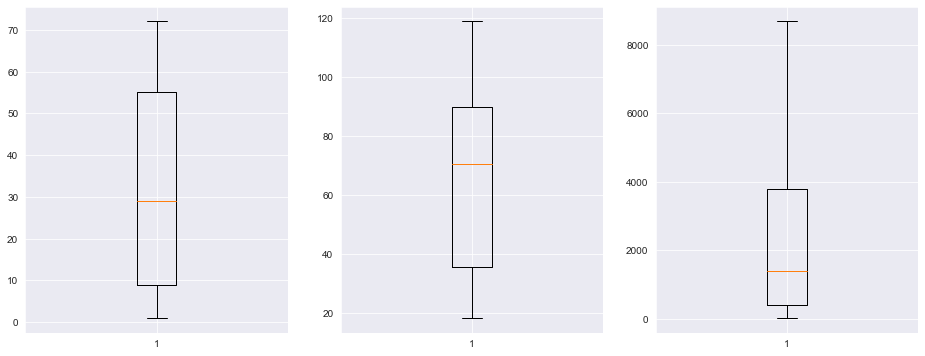

In [20]:
numerical_columns = ['tenure_months','monthly_charges', 'total_charges']
fig,ax = plt.subplots(1,3,figsize = (16,6))
for i in range(3):
   ax[i].boxplot(telco[numerical_columns[i]])

plt.show()

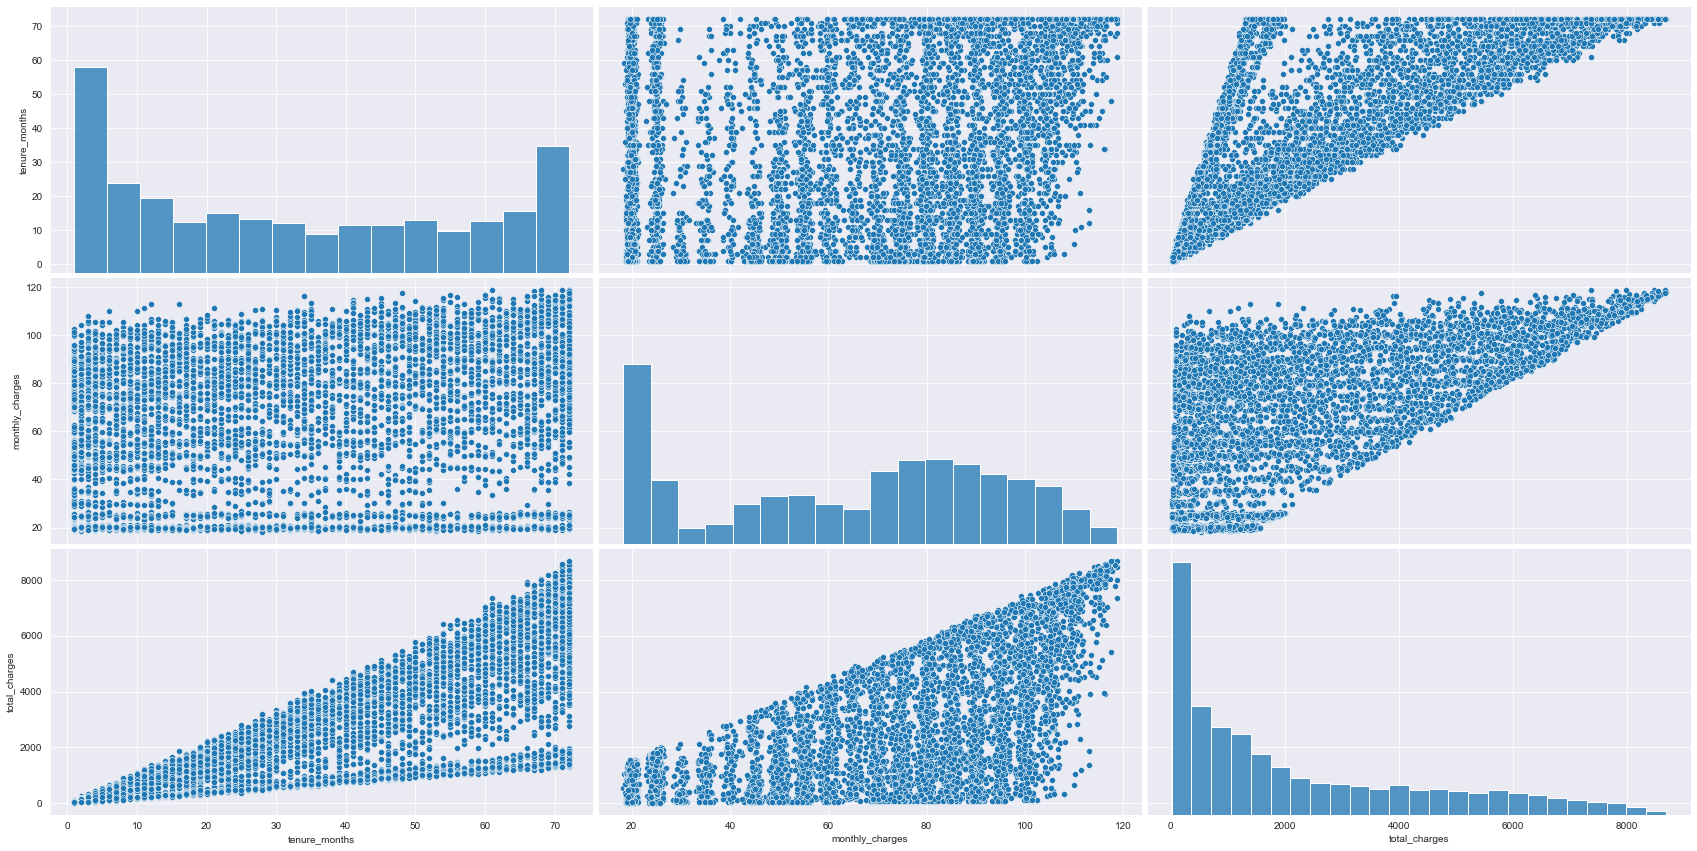

In [21]:
sns.pairplot(telco[numerical_columns],height =4, aspect=2)

### Feature Engineering

Binning zip code to the second number to be easier to interrupt for Machine Learning algorithm

In [22]:
telco['zip_code'] = (telco['zip_code'] // 10 ** 3) % 10

In [23]:
telco['zip_code'].value_counts()

5    1864
2    1310
3    1052
0     805
4     800
1     760
6     452
Name: zip_code, dtype: int64

one hot encoding for catgorical data

In [24]:
telco = pd.get_dummies(telco,columns=['zip_code','gender','senior_citizen','partner','dependents', 'phone_service',
                 'multiple_lines', 'internet_service', 'online_security',
                 'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                 'streaming_movies', 'contract', 'paperless_billing', 'payment_method'],drop_first=True)

len(telco.columns)

36

#### Build ML Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,MinMaxScaler

X_train,X_test,y_train,y_test = train_test_split(telco,target,random_state=42,shuffle=True,stratify=target)

log_transform = PowerTransformer()
mmscaler = MinMaxScaler()

X_train_transformed = log_transform.fit_transform(X_train)
X_train_transformed = mmscaler.fit_transform(X_train)

X_test_transformed = log_transform.transform(X_test)
X_test_transformed = mmscaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
LR_pram = [{'penalty':['l2', 'none'],
           'C':[1,0.1,0.01,0.001]}]

GS = GridSearchCV(LR,LR_pram,scoring = 'accuracy',cv=5)
GS.fit(X_train_transformed,y_train)

print(GS.best_params_)
print(GS.best_score_)

C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Salah Mohamed\anaconda3\lib\site-packages\sklearn\linear_mode

{'C': 1, 'penalty': 'none'}
0.8127569450417133


In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(penalty='none')
lr_cv_score = (cross_val_score(lr,X_train_transformed,y_train,cv=5)).mean()
lr.fit(X_train_transformed,y_train)
lr_y_train_pred = lr.predict(X_train_transformed)
lr_train_score = accuracy_score(y_train,lr_y_train_pred)
lr_y_test_pred = lr.predict(X_test_transformed)
lr_test_score = accuracy_score(y_test,lr_y_test_pred)

print(confusion_matrix(y_test,lr_y_test_pred))
print(classification_report(y_test,lr_y_test_pred))

[[1144  150]
 [ 199  268]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1294
           1       0.64      0.57      0.61       467

    accuracy                           0.80      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.80      0.80      1761



In [29]:
from sklearn.svm import SVC

svc = SVC()
svc_pram = [{'C':[100,10,1,0.1,0.001],
             'gamma' : ['scale', 'auto']}]

GS_3 = GridSearchCV(svc,svc_pram,scoring='accuracy',cv = 5)
GS_3.fit(X_train_transformed,y_train)

print(GS_3.best_params_)
print(GS_3.best_score_)

{'C': 10, 'gamma': 'auto'}
0.8089690662538345


In [40]:
svc = SVC(C=10,gamma = 'auto')
svc_cv_score = (cross_val_score(svc,X_train_transformed,y_train,cv = 5)).mean()
svc.fit(X_train_transformed,y_train)
svc_y_train_pred = svc.predict(X_train_transformed)
svc_train_score = accuracy_score(y_train,svc_y_train_pred)
svc_y_test_pred = svc.predict(X_test_transformed)
svc_test_score = accuracy_score(y_test,svc_y_test_pred)

print(confusion_matrix(y_test,svc_y_test_pred))
print(classification_report(y_test,svc_y_test_pred))

[[1169  125]
 [ 221  246]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.53      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [41]:
from sklearn.ensemble import VotingClassifier

classifiers = [('LogisticRegression',lr),('SupportVectorClassifier',svc)]
vg = VotingClassifier(estimators=classifiers)
vg_cv_score = (cross_val_score(vg,X_train_transformed,y_train,cv = 5)).mean()
vg.fit(X_train_transformed,y_train)
vg_y_train_pred = vg.predict(X_train_transformed)
vg_train_score = accuracy_score(y_train,vg_y_train_pred)
vg_y_test_pred = vg.predict(X_test_transformed)
vg_test_score = accuracy_score(y_test,vg_y_test_pred)

print(confusion_matrix(y_test,vg_y_test_pred))
print(classification_report(y_test,vg_y_test_pred))

[[1178  116]
 [ 233  234]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy',max_depth=5).fit(X_train,y_train)
rf_cv_score = cross_val_score(rf,X_train,y_train,cv = 5).mean()
rf_y_train_pred = rf.predict(X_train)
rf_train_score = accuracy_score(y_train,rf_y_train_pred)
rf_y_test_pred = rf.predict(X_test)
rf_test_score = accuracy_score(y_test,rf_y_test_pred)

print(confusion_matrix(y_test,rf_y_test_pred))
print(classification_report(y_test,rf_y_test_pred))

[[1208   86]
 [ 279  188]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1294
           1       0.69      0.40      0.51       467

    accuracy                           0.79      1761
   macro avg       0.75      0.67      0.69      1761
weighted avg       0.78      0.79      0.77      1761



In [65]:
models_scores = {'model_name':['LogisticRegression','SupportVectorClassifier','VotingClassifier','RandomForestClassifier'],
                 'train_scores':[lr_train_score,svc_train_score,vg_train_score,rf_train_score],
                 'validation_scores':[lr_cv_score,svc_cv_score,vg_cv_score,rf_cv_score],
                 'test_scores':[lr_test_score,svc_test_score,vg_cv_score,rf_test_score]}

df = pd.DataFrame(models_scores)
df.set_index('model_name',inplace=True)
df = (df * 100).round(2)
df

,train_scores,validation_scores,test_scores
model_name,,,
LogisticRegression,81.54,81.28,80.18
SupportVectorClassifier,82.30,80.90,80.35
VotingClassifier,82.09,81.07,81.07
RandomForestClassifier,80.50,79.93,79.27
